In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [24]:
# classes balance
df.target.value_counts()

0    230
1    184
Name: target, dtype: int64

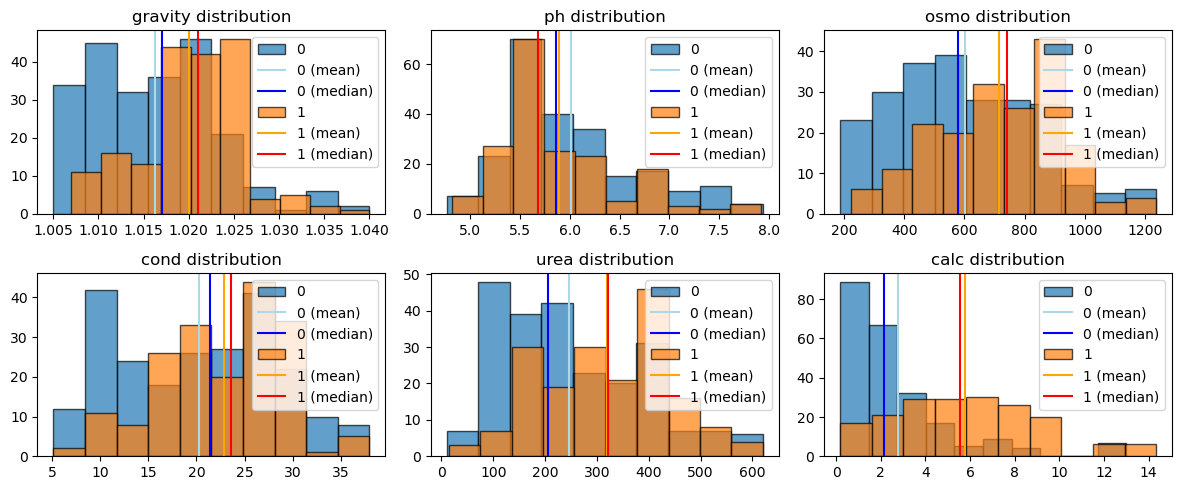

In [21]:
# distributions overview
rows = 2
cols = 3
columns = df.columns[~df.columns.isin(('id', 'target'))]

fig, ax = plt.subplots(rows, cols, figsize=(12, 5))
for num, field in enumerate(columns):
    col = num % cols
    row = num // cols
    a = df.loc[df.target == 0, field]
    t = df.loc[df.target == 1, field]
    
    ax[row, col].hist(a, edgecolor='black', alpha=0.7, label='0')
    ax[row, col].axvline(a.mean(), color='lightblue', label='0 (mean)')
    ax[row, col].axvline(a.median(), color='blue', label='0 (median)')

    ax[row, col].hist(t, edgecolor='black', alpha=0.7, label='1')
    ax[row, col].axvline(t.mean(), color='orange', label='1 (mean)')
    ax[row, col].axvline(t.median(), color='red', label='1 (median)')

    ax[row, col].set_title(f'{field} distribution')
    ax[row, col].legend()
fig.tight_layout()
plt.show()

In [ ]:
#